# Analyzing Video Games Sales Data

Source: [Kaggle Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Business Question

  * What factors are affecting the overall sales volume?
  * Is it possible to predict the sales volume?

## Collecting and first Look into Data (really basic)

In [4]:
df = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Conclusion

  * ???

## Data Wrangling (really basic)

### Remove relevant Not-A-Number-Values and convert relevant Columns

In [131]:
df_nan = df.dropna(subset=["User_Score", "User_Count", "Critic_Score", "Critic_Count"])
df_nan.loc[:,"User_Score"] = df_nan["User_Score"].astype(float)

### Formatting Date Values

In [132]:
df_nan.loc[:, "Year_of_Release"] = df_nan["Year_of_Release"].astype(str)
df_nan.loc[:, "Year_of_Release"] = df_nan["Year_of_Release"].str.rstrip(".0")
df_nan.loc[:,"Year_of_Release"] = pd.to_datetime(df_nan["Year_of_Release"], errors="coerce")

## Exploratory Data Analysis

### Sales by Publisher

In [47]:
publisher_most_sales = df_nan.groupby("Publisher")[["Global_Sales",
                                                  "NA_Sales", 
                                                  "EU_Sales", 
                                                  "JP_Sales", 
                                                  "Other_Sales"]].sum().sort_values(by="Global_Sales", ascending=False)[:20]

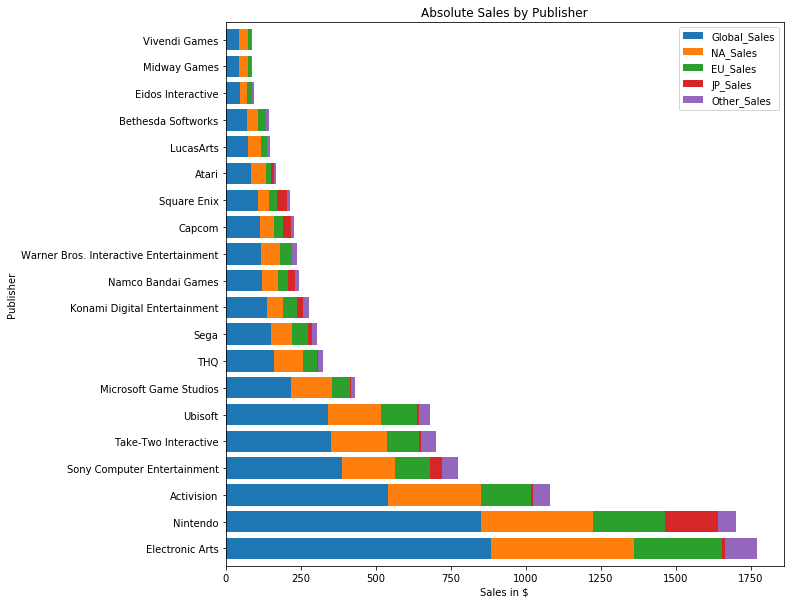

In [78]:
_ = publisher_most_sales.plot(kind="barh", figsize=(10,10), stacked=True, width=0.8)
_ = plt.xlabel("Sales in $")
_ = plt.title("Absolute Sales by Publisher")

#### Conclusion

  * ???

### Sales by Platform

#### Absolute Sum of Sales

In [44]:
platform_most_sales = df_nan.groupby("Platform")[["Global_Sales",
                                                  "NA_Sales", 
                                                  "EU_Sales", 
                                                  "JP_Sales", 
                                                  "Other_Sales"]].sum().sort_values(by="Global_Sales", ascending=False)[:30]

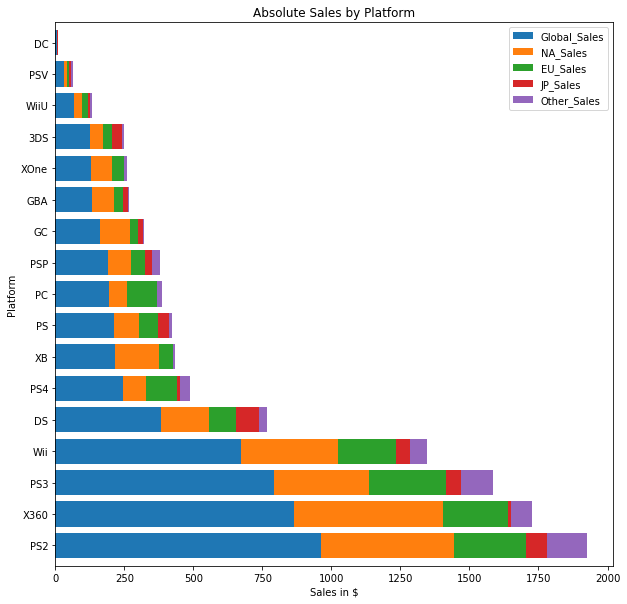

In [79]:
_ = platform_most_sales.plot(kind="barh", figsize=(10,10), stacked=True, width=0.8)
_ = plt.xlabel("Sales in $")
_ = plt.title("Absolute Sales by Platform")

#### Conclusion

  * ???

#### Mean of Sales

In [81]:
platform_most_sales_mean = df_nan.groupby("Platform")[["Global_Sales"]].mean().sort_values(by="Global_Sales", ascending=False)[:30]

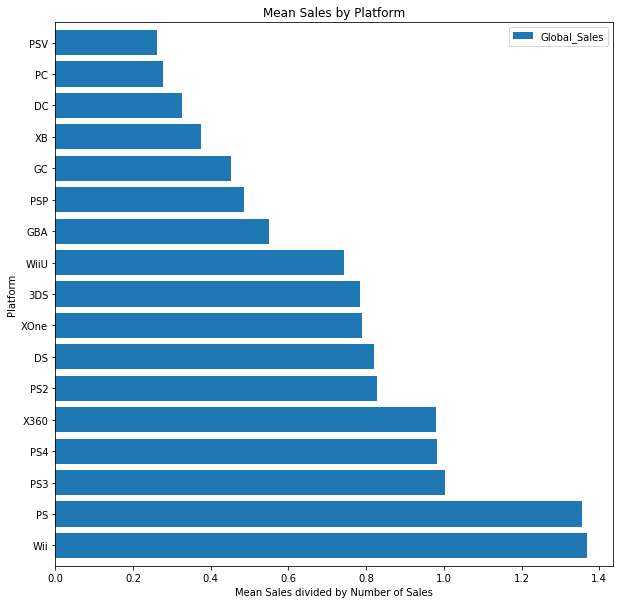

In [86]:
_ = platform_most_sales_mean.plot(kind="barh", figsize=(10,10), stacked=True, width=0.8)
_ = plt.xlabel("Mean Sales divided by Number of Sales")
_ = plt.title("Mean Sales by Platform")

#### Conclusion

  * ???

### Sales by Time and Publisher

#### Mean Sales

In [155]:
df_2d_year_publisher = df_nan.groupby(["Year_of_Release", "Publisher"])["Global_Sales"].mean().unstack()[["Electronic Arts", 
                                                                                   "Nintendo", 
                                                                                   "Activision", 
                                                                                   "Sony Computer Entertainment",
                                                                                   "Take-Two Interactive",
                                                                                   "Ubisoft"]].fillna(0)

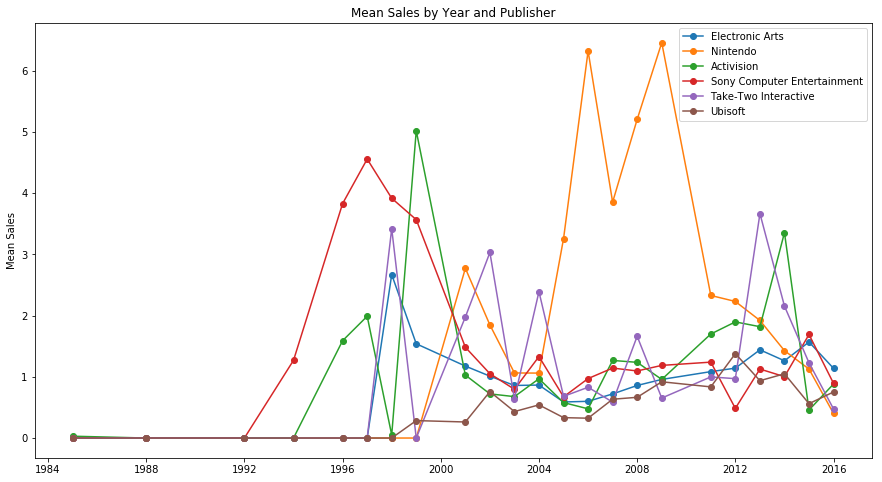

In [156]:
fig = plt.figure(figsize=(15,8))

for column in df_2d_year_publisher.columns:
    plt.plot(df_2d_year_publisher[column],"-o")
    
_ = plt.legend(df_2d_year_publisher.columns)
_ = plt.title("Mean Sales by Year and Publisher")
_ = plt.ylabel("Mean Sales")

#### Conclusion

  * ???

#### Absolute Sales

In [141]:
df_2d_year_publisher = df_nan.groupby(["Year_of_Release", "Publisher"])["Global_Sales"].sum().unstack()[["Electronic Arts", 
                                                                                   "Nintendo", 
                                                                                   "Activision", 
                                                                                   "Sony Computer Entertainment",
                                                                                   "Take-Two Interactive",
                                                                                   "Ubisoft"]].fillna(0)

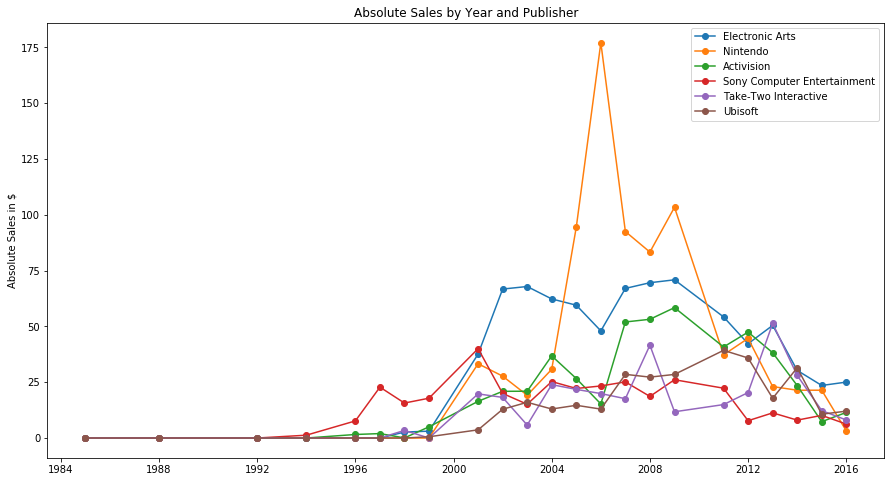

In [153]:
fig = plt.figure(figsize=(15,8))

for column in df_2d_year_publisher.columns:
    plt.plot(df_2d_year_publisher[column],"-o")
    
_ = plt.legend(df_2d_year_publisher.columns)
_ = plt.title("Absolute Sales by Year and Publisher")
_ = plt.ylabel("Absolute Sales in $")

#### Conclusion
  * ???


## Feature Engineering

### Correlation between Sales, User Score and Critic Score

In [83]:
df_corr = df_nan[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Global_Sales", "User_Score", "Critic_Score"]]

In [84]:
df_corr.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,User_Score,Critic_Score
NA_Sales,1.000000,0.839998,0.467134,0.727141,0.955487,0.086496,0.233367
EU_Sales,0.839998,1.000000,0.518734,0.716482,0.938667,0.055573,0.212023
JP_Sales,0.467134,0.518734,1.000000,0.394249,0.612539,0.127103,0.146175
Other_Sales,0.727141,0.716482,0.394249,1.000000,0.804513,0.057359,0.191105
Global_Sales,0.955487,0.938667,0.612539,0.804513,1.000000,0.088583,0.236953
User_Score,0.086496,0.055573,0.127103,0.057359,0.088583,1.000000,0.580878
Critic_Score,0.233367,0.212023,0.146175,0.191105,0.236953,0.580878,1.000000


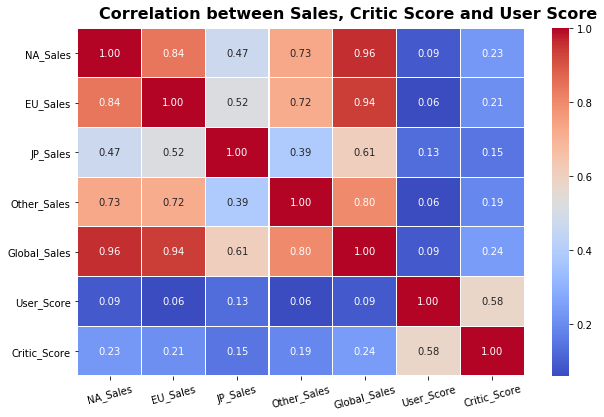

In [85]:
f, ax = plt.subplots(figsize=(10, 6))
corr = df_corr.corr()
hm = sb.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
plt.xticks(rotation=15)
t= f.suptitle('Correlation between Sales, Critic Score and User Score', color="black",fontsize=16, fontweight='bold')

### Conclusion

  * ???